## Import librairies

In [136]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import validation_curve

# warnings
import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None  #hide any pandas warnings

sns.set(style="whitegrid", color_codes=True)

In [138]:
# Define confusion matrix function
def do_confusion_matrix(Y, prediction):
    cm = confusion_matrix(Y, prediction)
    cm_df = pd.DataFrame(cm, index=["True", "False"], columns=["Positive", "Negative"])
    sns.heatmap(cm_df, annot=True, square=True, cmap="YlGnBu")
    plt.tight_layout()
    plt.show()
    print("Sensitivity (True Positives Rate):", np.round(cm[0,0]/(cm[0,0] + cm[1,1]), 2))
    print("Specificity (True Negatives Rate):", np.round(cm[0,1]/(cm[0,1] + cm[1,0]), 2))

## Read Dataset

In [139]:
# Read data
file_name = 'heart.csv'
ds = pd.read_csv(file_name)

# Drop rows with thal equal to 0
ds.drop(ds[ds['thal'] == 0].index, axis=0, inplace=True)

## Rename of columns and type conversion

In [140]:
# Columns rename
ds.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

# Modifico i valori in modo da identificare con chiarezza le
# feature categoriche
ds['sex'][ds['sex'] == 0] = 'female'
ds['sex'][ds['sex'] == 1] = 'male'

ds['chest_pain_type'][ds['chest_pain_type'] == 0] = 'typical angina'
ds['chest_pain_type'][ds['chest_pain_type'] == 1] = 'atypical angina'
ds['chest_pain_type'][ds['chest_pain_type'] == 2] = 'non-anginal pain'
ds['chest_pain_type'][ds['chest_pain_type'] == 3] = 'asymptomatic'

ds['fasting_blood_sugar'][ds['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
ds['fasting_blood_sugar'][ds['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

ds['rest_ecg'][ds['rest_ecg'] == 0] = 'normal'
ds['rest_ecg'][ds['rest_ecg'] == 1] = 'ST-T wave abnormality'
ds['rest_ecg'][ds['rest_ecg'] == 2] = 'left ventricular hypertrophy'

ds['exercise_induced_angina'][ds['exercise_induced_angina'] == 0] = 'no'
ds['exercise_induced_angina'][ds['exercise_induced_angina'] == 1] = 'yes'

ds['st_slope'][ds['st_slope'] == 0] = 'upsloping'
ds['st_slope'][ds['st_slope'] == 1] = 'flat'
ds['st_slope'][ds['st_slope'] == 2] = 'downsloping'

ds['thalassemia'][ds['thalassemia'] == 1] = 'normal'
ds['thalassemia'][ds['thalassemia'] == 2] = 'fixed defect'
ds['thalassemia'][ds['thalassemia'] == 3] = 'reversable defect'


# Converto i tipi in modo corretto

ds['sex'] = ds['sex'].astype('object')
ds['chest_pain_type'] = ds['chest_pain_type'].astype('object')
ds['fasting_blood_sugar'] = ds['fasting_blood_sugar'].astype('object')
ds['rest_ecg'] = ds['rest_ecg'].astype('object')
ds['exercise_induced_angina'] = ds['exercise_induced_angina'].astype('object')
ds['st_slope'] = ds['st_slope'].astype('object')
ds['thalassemia'] = ds['thalassemia'].astype('object')

# Exploratory data analysis

In [141]:
# Dataset sample
ds.sample(10)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
18,43,male,typical angina,150,247,lower than 120mg/ml,ST-T wave abnormality,171,no,1.5,downsloping,0,fixed defect,1
280,42,male,typical angina,136,315,lower than 120mg/ml,ST-T wave abnormality,125,yes,1.8,flat,0,normal,0
143,67,female,typical angina,106,223,lower than 120mg/ml,ST-T wave abnormality,142,no,0.3,downsloping,2,fixed defect,1
24,40,male,asymptomatic,140,199,lower than 120mg/ml,ST-T wave abnormality,178,yes,1.4,downsloping,0,reversable defect,1
173,58,male,non-anginal pain,132,224,lower than 120mg/ml,normal,173,no,3.2,downsloping,2,reversable defect,0
267,49,male,non-anginal pain,118,149,lower than 120mg/ml,normal,126,no,0.8,downsloping,3,fixed defect,0
155,58,female,typical angina,130,197,lower than 120mg/ml,ST-T wave abnormality,131,no,0.6,flat,0,fixed defect,1
38,65,female,non-anginal pain,155,269,lower than 120mg/ml,ST-T wave abnormality,148,no,0.8,downsloping,0,fixed defect,1
191,58,male,typical angina,128,216,lower than 120mg/ml,normal,131,yes,2.2,flat,3,reversable defect,0
110,64,female,typical angina,180,325,lower than 120mg/ml,ST-T wave abnormality,154,yes,0.0,downsloping,0,fixed defect,1


In [142]:
# Shape of dataset
print("Rows:", ds.shape[0], "\nFeatures:", ds.shape[1])

Rows: 301 
Features: 14


## Correlation heatmap

Uso solo i dati numerici per ottenere una matrice di correlazione

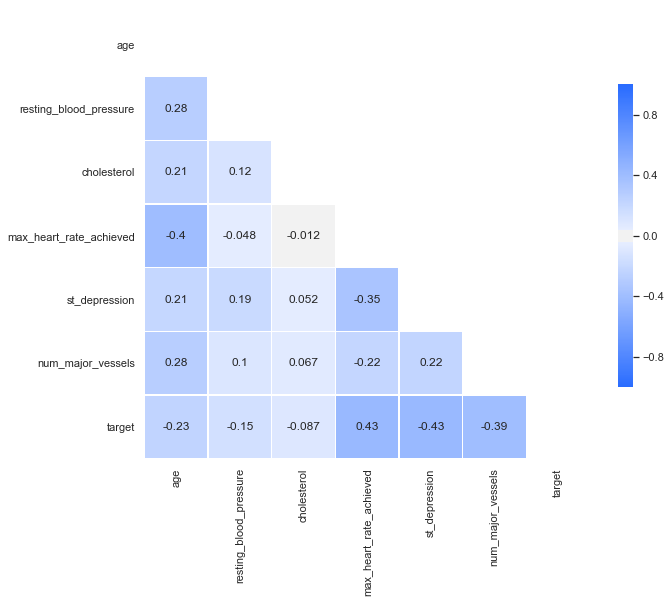

In [195]:
# Matrix Correlation Plot
corr = ds.corr(method='pearson')
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
cmap = sns.diverging_palette(260, 260, s=100, l=50, n=9, as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-1, center=0, square=True, linewidth=.5, cbar_kws={'shrink': .5}, annot=True, mask=mask, cmap=cmap)
plt.tight_layout()
plt.show()

In [203]:
print("There are missing values?", ds.isnull().values.any(), "\n")
ds.info()

There are missing values? False 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 0 to 302
Data columns (total 19 columns):
age                                        301 non-null int64
resting_blood_pressure                     301 non-null int64
cholesterol                                301 non-null int64
max_heart_rate_achieved                    301 non-null int64
st_depression                              301 non-null float64
num_major_vessels                          301 non-null int64
target                                     301 non-null int64
sex_male                                   301 non-null uint8
chest_pain_type_atypical angina            301 non-null uint8
chest_pain_type_non-anginal pain           301 non-null uint8
chest_pain_type_typical angina             301 non-null uint8
fasting_blood_sugar_lower than 120mg/ml    301 non-null uint8
rest_ecg_left ventricular hypertrophy      301 non-null uint8
rest_ecg_normal                            301 non-nu

## Categorical features handling using dummy features

In [197]:
# Dummy features
ds = pd.get_dummies(ds, drop_first=True)

## Data distribution

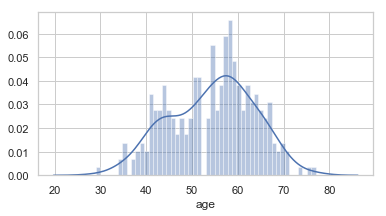

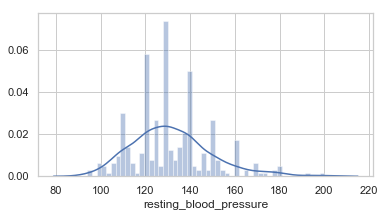

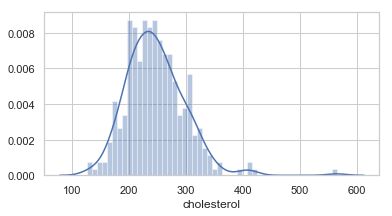

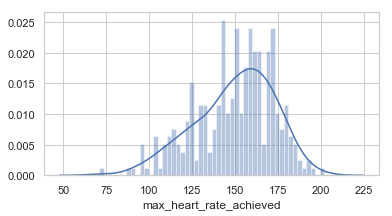

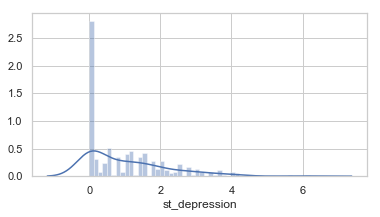

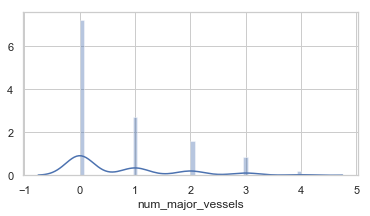

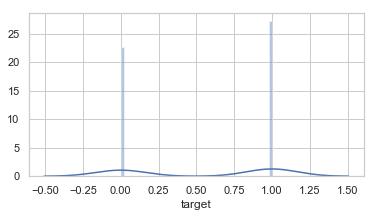

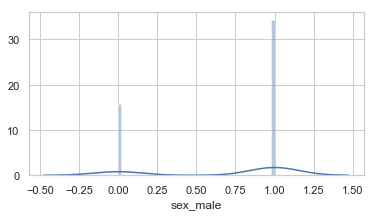

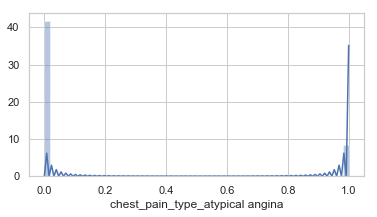

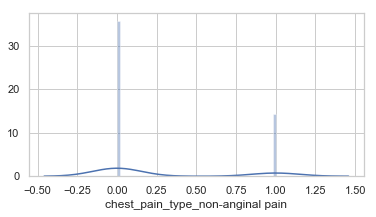

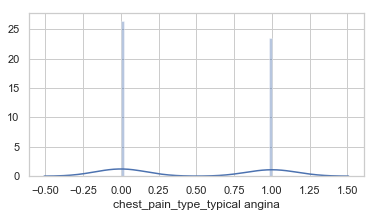

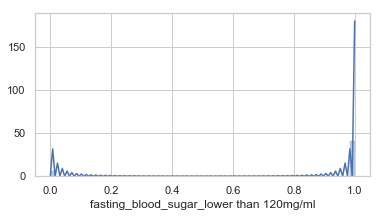

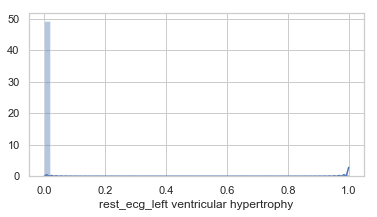

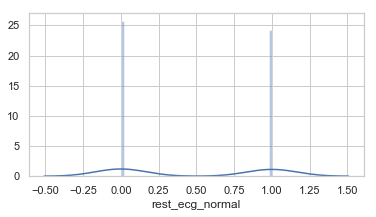

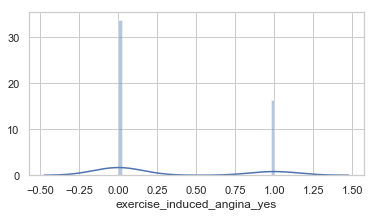

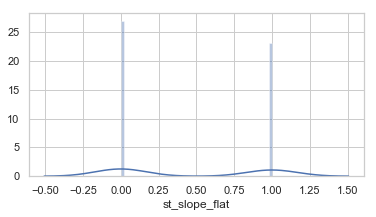

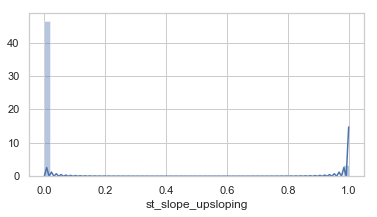

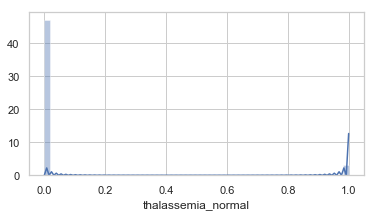

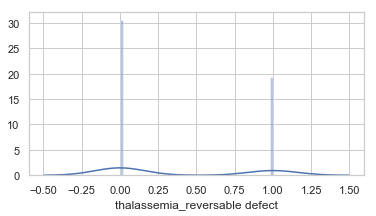

In [205]:
pd.set_option('display.max_columns', None)
ds.describe()

for c in ds.columns:
    plt.figure(figsize=(6, 3))
    sns.distplot(ds[c], hist=True, bins=50)
    plt.show()

# Model implementation and tuning

In [102]:
# Split data in dataset and values to predict
X = ds.drop(['target'], axis=1) # X -> data
Y = ds['target'] # Y -> values to predict

## Feature importance

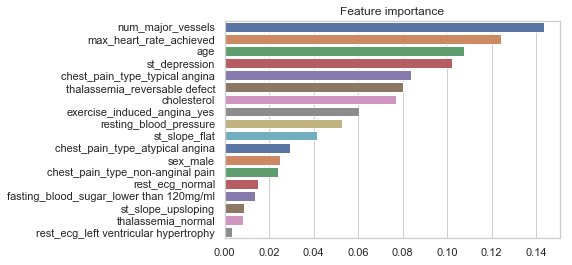

In [229]:
#Uso RFC per estrarre le features più importanti

model = RandomForestClassifier(random_state = 50)

model.fit(X, Y)
#feature_importance = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['RFC']).sort_values('RFC', ascending=False)
#
#feature_importance.head(10)

sns.barplot(x=feature_importance.values[:,0], y=feature_importance.index, palette="deep").set_title("Feature importance")
plt.show()
model = None

## Data normalization

In [104]:
# Normalizzo i dati
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
columns_names = X.columns
# Fit your data on the scaler object
X_scaled = X
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=columns_names)
X_scaled.describe()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_normal,thalassemia_reversable defect
count,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,301.000000,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02
mean,8.262125e-17,2.950759e-16,3.835987e-17,-9.442428e-17,0.000000,-2.360607e-17,-2.360607e-17,1.180304e-17,4.721214e-17,9.442428e-17,-1.209811e-16,2.065531e-17,-1.239319e-16,-7.081821e-17,-2.360607e-17,6.491670e-17,5.901518e-18,2.360607e-17
std,1.001665e+00,1.001665e+00,1.001665e+00,1.001665e+00,1.001665,1.001665e+00,1.001665e+00,1.001665e+00,1.001665e+00,1.001665e+00,1.001665e+00,1.001665e+00,1.001665e+00,1.001665e+00,1.001665e+00,1.001665e+00,1.001665e+00,1.001665e+00
min,-2.790159e+00,-2.143374e+00,-2.325019e+00,-3.445541e+00,-0.898179,-7.180170e-01,-1.472556e+00,-4.463218e-01,-6.324555e-01,-9.450300e-01,-2.416797e+00,-1.160518e-01,-9.705336e-01,-6.948083e-01,-9.262962e-01,-2.738613e-01,-2.521988e-01,-7.974143e-01
25%,-8.112244e-01,-6.631372e-01,-6.850318e-01,-6.887884e-01,-0.898179,-7.180170e-01,-1.472556e+00,-4.463218e-01,-6.324555e-01,-9.450300e-01,4.137707e-01,-1.160518e-01,-9.705336e-01,-6.948083e-01,-9.262962e-01,-2.738613e-01,-2.521988e-01,-7.974143e-01
50%,1.782429e-01,-9.381519e-02,-1.062129e-01,1.426132e-01,-0.209384,-7.180170e-01,6.790913e-01,-4.463218e-01,-6.324555e-01,-9.450300e-01,4.137707e-01,-1.160518e-01,-9.705336e-01,-6.948083e-01,-9.262962e-01,-2.738613e-01,-2.521988e-01,-7.974143e-01
75%,7.279470e-01,4.755068e-01,5.497818e-01,7.114670e-01,0.479410,2.599157e-01,6.790913e-01,-4.463218e-01,1.581139e+00,1.058167e+00,4.137707e-01,-1.160518e-01,1.030361e+00,1.439246e+00,1.079568e+00,-2.738613e-01,-2.521988e-01,1.254053e+00
max,2.487000e+00,3.891439e+00,6.125737e+00,2.286754e+00,4.439978,3.193714e+00,6.790913e-01,2.240536e+00,1.581139e+00,1.058167e+00,4.137707e-01,8.616844e+00,1.030361e+00,1.439246e+00,1.079568e+00,3.651484e+00,3.965126e+00,1.254053e+00


## Train Set and Validation Set Split

In [230]:
# Split train set and test set (train: 75% test: 25%)
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = 0.2, random_state = 50)
print("Train set:", np.round(X_train.shape[0]/X.shape[0]*100), "%", "({}/{})".format(X_train.shape[0], X.shape[0]))
print("Test set:", np.round(X_test.shape[0]/X.shape[0]*100), "%", "({}/{})".format(X_test.shape[0], X.shape[0]))

Train set: 80.0 % (240/301)
Test set: 20.0 % (61/301)


The accuracy score on the testing set: 81.967 %


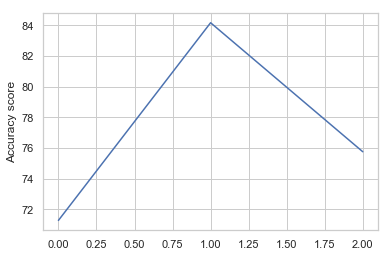

Accuracy CV: 77.06766666666665 %


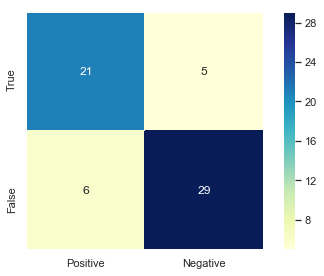

Sensitivity (True Positives Rate): 0.42
Specificity (True Negatives Rate): 0.45


In [231]:
# First attempt
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(random_state = 50)
model = model.fit(X_train, Y_train)
prediction = model.predict(X_test)
accuracy = accuracy_score(Y_test, prediction)
accuracy = np.round(accuracy * 100, 3)


print("The accuracy score on the testing set:", accuracy,"%")
#print("Hyperparameters values:\n", model.get_params())
model = None

from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(random_state = 50)
#model = model.fit(X, Y_train)
accuracy = cross_val_score(model, X_scaled, Y, cv = 3, scoring = 'accuracy')
accuracy = np.round(accuracy * 100, 3)

model = None

plt.plot(accuracy, 'b', label="Training Acc")
plt.ylabel('Accuracy score')
plt.show()
print("Accuracy CV:", np.mean(accuracy), "%")

do_confusion_matrix(Y_test, prediction)

### Hyperparameters tuning using Cross Validation


In [116]:

def do_validation_curve(classifier, x, y, param_name, param_range):
    train_scores, test_scores = validation_curve(
                                    classifier,
                                    X=x, y=y, 
                                    param_name=param_name, 
                                    param_range=param_range,
                                    cv = 3)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(10, 5))
    plt.title("Validation Curve with RFC")
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.ylim(0.6, 1.1)
    lw = 1
    plt.plot(param_range, train_scores_mean,'.-', label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, '.-', label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    plt.show()
    
    return test_scores_mean

In [109]:
# Definisco le liste di iperparametri
# n_estimators max_depth min_samples_split min_samples_leaf max_features

max_features = list(range(1,X_scaled.shape[1]))
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 300, 500, 750]
min_samples_leaf = [1, 2, 4, 8]
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
bootstrap = [False, True]

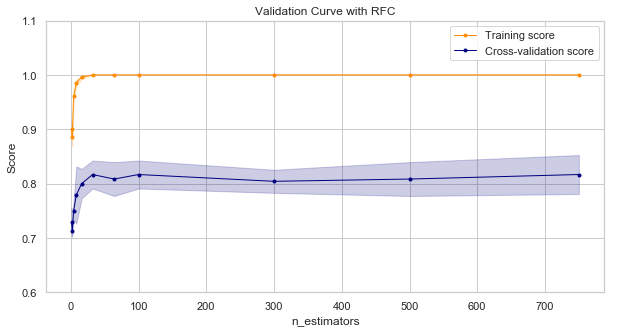

Best n_estimators: 32


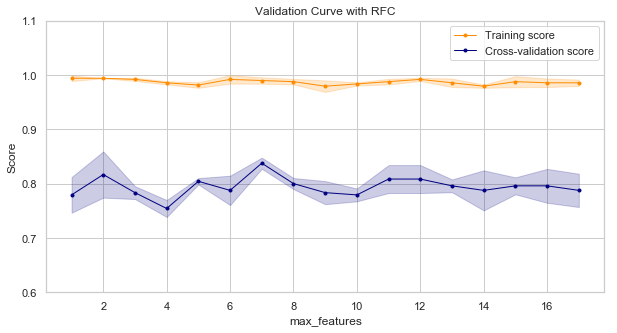

Best max_features: 7


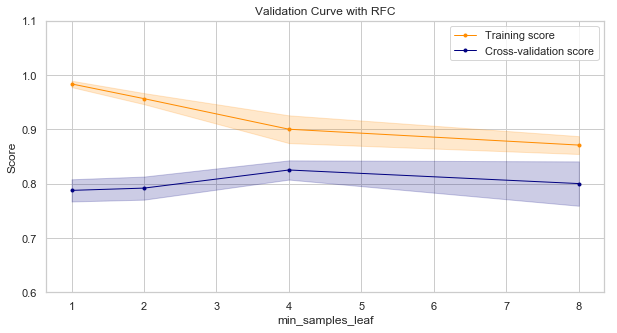

Best min_samples_leaf: 4


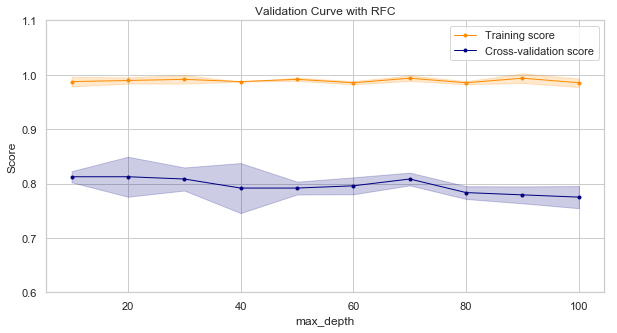

Best max_depth: 10


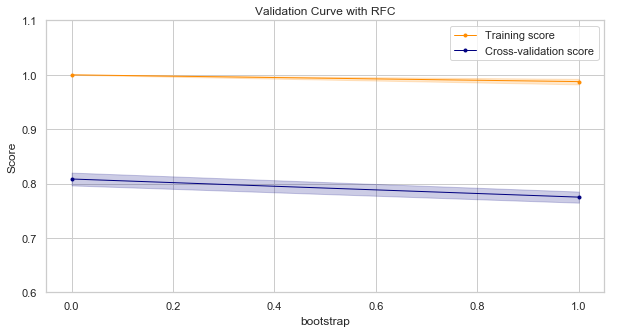

Best bootstrap: False


In [121]:
# Tuning n_estimators
test_scores_mean = do_validation_curve(RandomForestClassifier(), X_train, Y_train, 'n_estimators', n_estimators)
print("Best n_estimators:", n_estimators[np.argmax(test_scores_mean)])

# Tuning max_features
test_scores_mean = do_validation_curve(RandomForestClassifier(), X_train, Y_train, 'max_features', max_features)
print("Best max_features:", max_features[np.argmax(test_scores_mean)])

# Tuning min_samples_leaf
test_scores_mean = do_validation_curve(RandomForestClassifier(), X_train, Y_train, 'min_samples_leaf', min_samples_leaf)
print("Best min_samples_leaf:", min_samples_leaf[np.argmax(test_scores_mean)])

# Tuning max_depth
test_scores_mean = do_validation_curve(RandomForestClassifier(), X_train, Y_train, 'max_depth', max_depth)
print("Best max_depth:", max_depth[np.argmax(test_scores_mean)])

# Tuning bootstrap
test_scores_mean = do_validation_curve(RandomForestClassifier(), X_train, Y_train, 'bootstrap', bootstrap)
print("Best bootstrap:", bootstrap[np.argmax(test_scores_mean)])

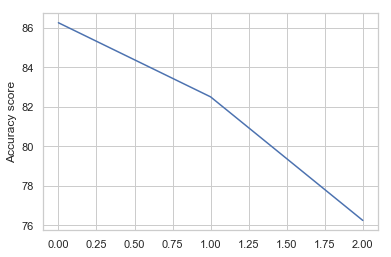

Cross Validation Accuracy Score: 81.667 %
The accuracy score on the testing set :  83.607 %


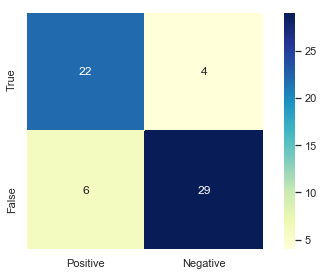

Sensitivity (True Positives Rate): 0.43
Specificity (True Negatives Rate): 0.4


In [124]:
# Cross Valdation Score
model = RandomForestClassifier(n_estimators=100, max_features=4, random_state = 50)
accuracy = cross_val_score(model, X_train, Y_train, cv = 3, scoring = 'accuracy')
accuracy = np.round(accuracy * 100, 3)
model = None

plt.plot(accuracy, 'b', label="Training Acc")
plt.ylabel('Accuracy score')
plt.show()
print("Cross Validation Accuracy Score:", np.round(np.mean(accuracy), 3), "%")

# Accuracy Score
model = RandomForestClassifier(n_estimators=100, max_features=4, random_state = 50)
model = model.fit(X_train, Y_train)
prediction = model.predict(X_test)
accuracy = accuracy_score(Y_test, prediction)
accuracy = np.round(accuracy * 100, 3)
print("The accuracy score on the testing set : ", accuracy,"%")

# Confusion Matrix
do_confusion_matrix(Y_test, prediction)

model = None

## Hyperparameter tuning using Test Set

In [125]:
def do_test_set_hyperparameter_tuning(x_train, x_test, y_train, y_test, param_name, param_range):
    train_results = []
    test_results = []
    for param in param_range:
        model = RandomForestClassifier(**{param_name: param, 'random_state': 50})
        model.fit(x_train, y_train)

        # Train prediction
        train_pred = model.predict(x_train)
        accuracy = accuracy_score(y_train, train_pred)
        train_results.append(accuracy)

        # Test prediction
        test_pred = model.predict(x_test)
        accuracy = accuracy_score(y_test, test_pred)
        test_results.append(accuracy)
        model = None

    plt.figure(figsize=(10, 5))
    plt.title("Accuracy")
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.ylim(0.6, 1.1)
    lw = 1
    plt.plot(param_range, train_results,'.-', label="Training score",
                 color="darkorange", lw=lw)
    plt.plot(param_range, test_results, '.-', label="Test score",
                 color="navy", lw=lw)
    plt.legend(loc="best")
    plt.show()
    print("Max Test Score:", np.round(np.max(test_results)*100, 3))
    print("Best Param Value:", param_range[np.argmax(test_results)])

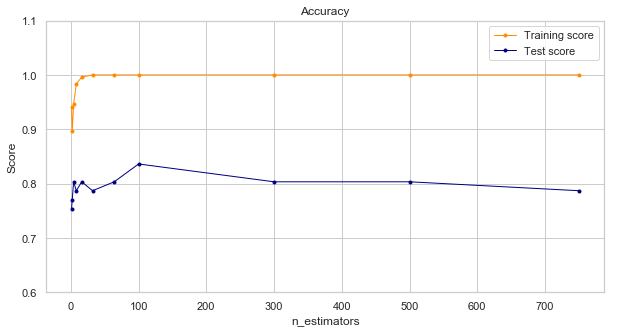

Max Test Score: 83.607
Best Param Value: 100


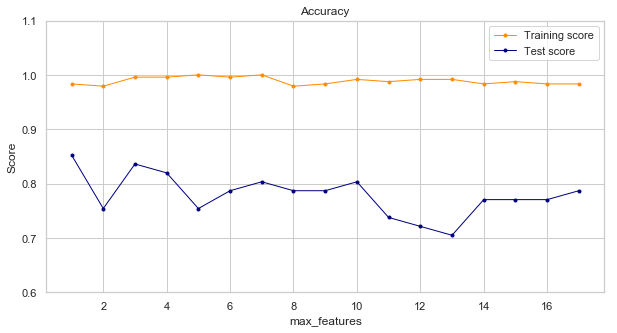

Max Test Score: 85.246
Best Param Value: 1


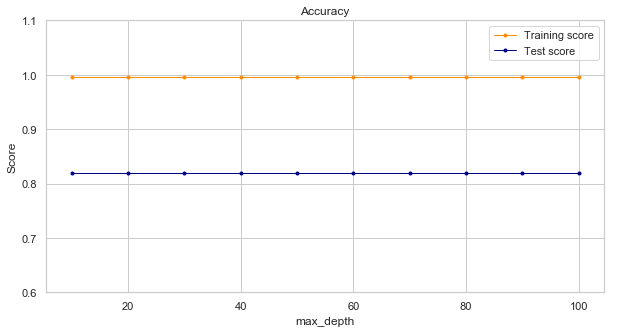

Max Test Score: 81.967
Best Param Value: 10


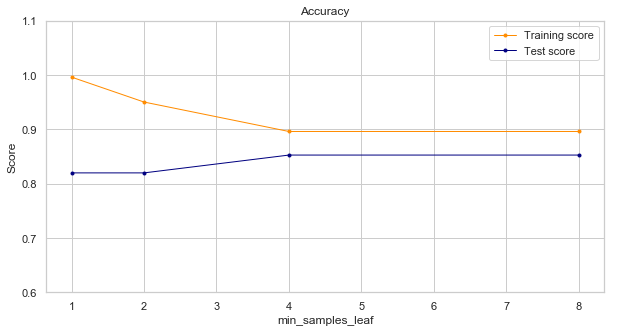

Max Test Score: 85.246
Best Param Value: 4


In [126]:
#max_features = list(range(1,X_scaled.shape[1]))
#n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 300, 500, 750, 900, 1200]
#min_samples_leaf = [1, 2, 4, 8]
#max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
#bootstrap = [False, True]

do_test_set_hyperparameter_tuning(X_train, X_test, Y_train, Y_test, "n_estimators", n_estimators)
do_test_set_hyperparameter_tuning(X_train, X_test, Y_train, Y_test, "max_features", max_features)
do_test_set_hyperparameter_tuning(X_train, X_test, Y_train, Y_test, "max_depth", max_depth)
do_test_set_hyperparameter_tuning(X_train, X_test, Y_train, Y_test, "min_samples_leaf", min_samples_leaf)

Test Set (without Hyperparameter tuning)
Accuracy on Test Set (without Hyperparameter tuning): 81.967 %


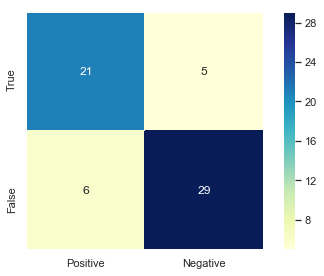

Sensitivity (True Positives Rate): 0.42
Specificity (True Negatives Rate): 0.45
**************************************************



Test Set (with Hyperparameter tuning)
Accuracy on Test Set (with Hyperparameter tuning): 86.885 %


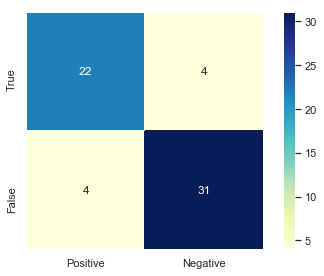

Sensitivity (True Positives Rate): 0.42
Specificity (True Negatives Rate): 0.5
**************************************************



Cross Validation on whole Dataset


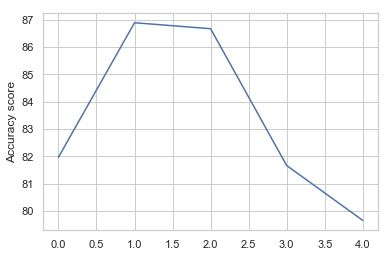

Accuracy CV: 83.36940000000001 %
**************************************************





In [134]:
# Test Set accuracy without Hyperparameter tuning
model = RandomForestClassifier(random_state=50)
model.fit(X_train, Y_train)

test_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, test_pred)
print("Test Set (without Hyperparameter tuning)")
print("Accuracy on Test Set (without Hyperparameter tuning):", np.round(accuracy*100, 3), "%")
do_confusion_matrix(Y_test, test_pred)
print("*"*50)
print("\n\n")
model = None

# Test Set Accuracy with Hyperparameter tuning
model = RandomForestClassifier(random_state=50, n_estimators=100, max_features=3, min_samples_leaf=4)
model.fit(X_train, Y_train)

test_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, test_pred)
print("Test Set (with Hyperparameter tuning)")
print("Accuracy on Test Set (with Hyperparameter tuning):", np.round(accuracy*100, 3), "%")
do_confusion_matrix(Y_test, test_pred)
print("*"*50)
print("\n\n")
model = None

# Whole Dataset with Cross Validation and Hyperparameter tuning
model = RandomForestClassifier(random_state=50, n_estimators=100, max_features=3, min_samples_leaf=4)
accuracy = cross_val_score(model, X_scaled, Y, cv = 5, scoring = 'accuracy')
accuracy = np.round(accuracy * 100, 3)

print("Cross Validation on whole Dataset")
plt.plot(accuracy, 'b', label="Accuracy CV")
plt.ylabel('Accuracy score')
plt.show()
print("Accuracy CV:", np.mean(accuracy), "%")
print("*"*50)
print("\n\n")

model = None

## Tuning with annidate loops

In [30]:
#max_features = list(range(1,X_scaled.shape[1]))
max_features = list(range(2,17))
n_estimators = [2, 4, 8, 16, 32, 64, 100, 300, 500]
accuracy_arr = np.zeros(len(max_features)*len(n_estimators))
tot = len(max_features)*len(n_estimators)*30
i = 0
# Itero k volte per ogni combinazione, ad ogni combinazione vengo quindi ad avere 5 misure, facendo la media delle 5
# ottengo un valore più preciso
for k in range(0,15):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.2)
    j = -1
    for estimator in n_estimators:
        for max_f in max_features:
            j += 1
            model = RandomForestClassifier(n_estimators=estimator, max_features=max_f)
            model.fit(x_train, y_train)
            test_pred = model.predict(x_test)
            accuracy = accuracy_score(y_test, test_pred)
            accuracy_arr[j] = accuracy_arr[j] + accuracy/15
            model = None
            
            print("{}%".format(np.round(i/tot*100, 2)), end="\r")
            i += 1
            

    
            
print("Best accuracy:", accuracy_arr)
#print("Best n_estimators:", best_n_estimators_list)
#print("Best max_features:", best_max_features_list)
        
        

Best accuracy: [0.71256831 0.70273224 0.68196721 0.71256831 0.72131148 0.71256831
 0.72459016 0.70819672 0.71256831 0.69071038 0.72459016 0.73442623
 0.72786885 0.72459016 0.71803279 0.75409836 0.7715847  0.7726776
 0.7704918  0.76065574 0.78032787 0.77923497 0.7442623  0.74098361
 0.74754098 0.7715847  0.73333333 0.77377049 0.7704918  0.76393443
 0.80218579 0.79344262 0.79781421 0.78688525 0.78579235 0.79781421
 0.78142077 0.78251366 0.78688525 0.78907104 0.78142077 0.79453552
 0.78251366 0.8010929  0.79016393 0.80765027 0.80546448 0.81420765
 0.81202186 0.79562842 0.79672131 0.80546448 0.80655738 0.80327869
 0.80437158 0.80983607 0.79562842 0.80437158 0.79672131 0.79672131
 0.81967213 0.83606557 0.8273224  0.83387978 0.82513661 0.82185792
 0.81857923 0.81420765 0.81530055 0.81420765 0.81530055 0.81530055
 0.80765027 0.81311475 0.80765027 0.82622951 0.83825137 0.83825137
 0.8284153  0.82622951 0.81311475 0.8273224  0.81967213 0.82076503
 0.82295082 0.81748634 0.81530055 0.80874317 0.8

In [47]:
accuracy_best = 0
n_estimators_best = 0
max_features_best = 0

j = -1
for estimator in n_estimators:
    for max_f in max_features:
        j += 1
        if accuracy_arr[j] > accuracy_best:
            #print("qui")
            accuracy_best = accuracy_arr[j]
            n_estimators_best = estimator
            max_features_best = max_f
            

print("Best accuracy:", accuracy_best)
print("Best n_estimators:", n_estimators_best)
print("Best max_features:", max_features_best)

Best accuracy: 0.8437158469945354
Best n_estimators: 100
Best max_features: 3


In [50]:
model = RandomForestClassifier(n_estimators=100, max_features=3, random_state=50)
model.fit(X_train, Y_train)
prediction = model.predict(X_test)
accuracy = accuracy_score(Y_test, prediction)
print("Accuracy:", np.round(accuracy*100, 3), "%")
model = None

Accuracy: 85.246 %


In [63]:
model = RandomForestClassifier(n_estimators=100, max_features=3, random_state=50)
accuracy = cross_val_score(model, X_train, Y_train, cv = 3, scoring = 'accuracy')
accuracy = np.mean(accuracy)
print("Accuracy:", np.round(accuracy*100, 3), "%")
model = None

Accuracy: 81.667 %


In [65]:
model = RandomForestClassifier(random_state=50)
accuracy = cross_val_score(model, X_train, Y_train, cv = 3, scoring = 'accuracy')
accuracy = np.mean(accuracy)
print("Accuracy:", np.round(accuracy*100, 3), "%")
model = None

Accuracy: 80.417 %
